# Unsupervised learning
### By Cooper Nederhood

In [10]:
# Load libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
%matplotlib inline


## Colleges (4 pts)

In [11]:
path_data = "C:/Users/Cooper/Documents/Autumn 2017/Perspectives I/persp-analysis/assignments/unsupervised-learning/data"
df = pd.read_csv(path_data+"/College.csv")

In [12]:
pca = PCA()

# For now, removing the private/public distinction, although we could just transform to a 1-0 flag
df_numeric = pd.DataFrame(df.select_dtypes(['number']))

# normalize our data to have mean = 0 and std_dev = 1, per the reading
for col in df_numeric.columns:
    df_numeric[col] = (df_numeric[col] - np.mean(df_numeric[col])) / np.std(df_numeric[col])
pca.fit(df_numeric)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

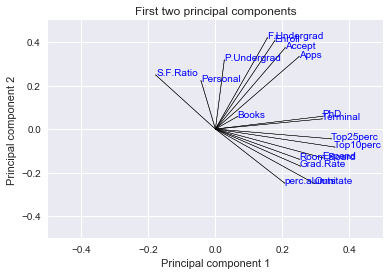

In [13]:
# Plot the loading for the first two PC's
pca_two = pca.components_.T[:, 0:2]
pca_df = pd.DataFrame(pca_two, index=df_numeric.columns, columns=['PC'+str(x) for x in range(1,3)])

# Plot
for i in pca_df.index:
    plt.annotate(i, (pca_df.PC1[i], pca_df.PC2[i]), color='blue')
    plt.arrow(0,0, pca_df.PC1[i], pca_df.PC2[i], color='black')

plt.ylim(-.5, .5)
plt.xlim(-.5, .5)
plt.title('First two principal components')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.style.use('seaborn')


(1) Above we have plotted the first two principal components. We see that variables 'PhD' and 'Terminal' as well as 'Top25perc' and 'Top10perc' are similar in weight with respect to PCA1. Analagously, variables 'F.Undergrad' and 'Enroll' have a similar weight with respect to PCA2. Variables 'perc.alumni' and 'Outstate' also have similar weights with respect to PCA2 but their weights have the opposite sign as 'F.Undergrad' and 'Enroll'. We can make these determinations simply by observing each variable's vector in the byplot above

In [14]:

cum_explained_df = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, index=["PC" + str(x) for x in range(1,18)], columns=['Pct var explained'])
cum_explained_df

,Pct var explained
PC1,32.020628
PC2,58.360843
PC3,65.261759
PC4,71.184748
PC5,76.673154
PC6,81.657854
PC7,85.216726
PC8,88.670347
PC9,91.787581
PC10,94.162773


Text(0,0.5,'Total explained variance')

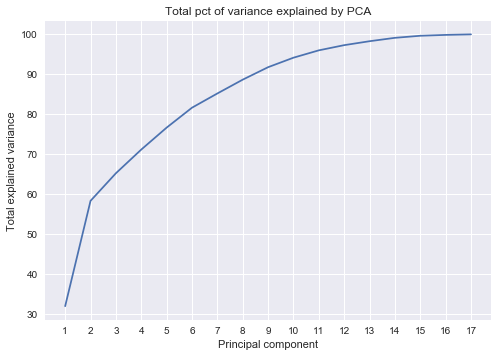

In [15]:
plt.plot(range(1,18), cum_explained_df['Pct var explained'])
plt.xticks(range(1,18))
plt.title('Total pct of variance explained by PCA')
plt.xlabel('Principal component')
plt.ylabel('Total explained variance')

(2) As shown in the table above, about 58% of the variance is explained in the first two principal components. As shown in the chart above, the marginal variance explained by each successive PCA is decreasing. Once we account for all PCA's, all variance is explained, as expected.

## Clustering states (6 pts)

#### (1) Perform PCA on the dataset and plot the observations on the first and second principal components.

In [16]:
# Load data
df_crime = pd.read_csv(path_data+"/USArrests.csv", index_col="State")
df_crime.head()

# normalize our data to have mean = 0 and std_dev = 1, per the reading
for col in df_crime.columns:
    df_crime[col] = (df_crime[col] - np.mean(df_crime[col])) / np.std(df_crime[col])


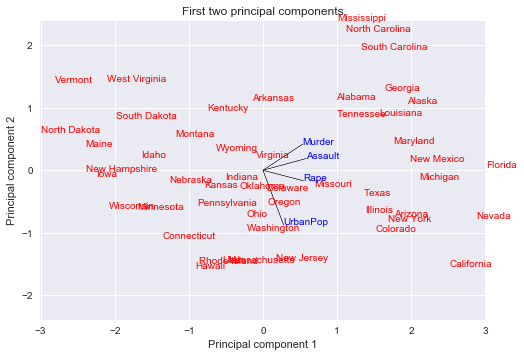

In [17]:
# PCA analysis
pca_crime = PCA()
pca_crime.fit(df_crime)

# Plot the loading for the first two PC's
pca_two = pca_crime.components_.T[:, 0:2]
pca_df = pd.DataFrame(pca_two, index=df_crime.columns, columns=['PC'+str(x) for x in range(1,3)])

# Plot the state level fits
pca_fits = pca_crime.fit_transform(df_crime)
fits_df = pd.DataFrame(pca_crime.fit_transform(df_crime), index=df_crime.index, columns=['PC'+str(x) for x in range(1,5)])

for i in fits_df.index:
    plt.annotate(i, (fits_df.PC1[i], fits_df.PC2[i]), color = 'red')

# Plot
for i in pca_df.index:
    plt.annotate(i, (pca_df.PC1[i], pca_df.PC2[i]), color='blue')
    plt.arrow(0,0, pca_df.PC1[i], pca_df.PC2[i], color='black')
    
xbound = np.max(np.abs(fits_df['PC1']))
ybound = np.max(np.abs(fits_df['PC2']))

plt.ylim(-ybound, ybound)
plt.xlim(-xbound, xbound)
plt.title('First two principal components')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.xticks()
plt.style.use('seaborn')


In [18]:
fits_df

,PC1,PC2,PC3,PC4
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285


#### (2) Perform K-means clustering with K=2. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

In [19]:
k2 = KMeans(n_clusters = 2, n_init=30).fit(df_crime)

centers = pca_crime.fit_transform(k2.cluster_centers_)
centers

array([[  1.40711264e+00,   1.95226409e-17],
       [ -1.40711264e+00,   1.95226409e-17]])

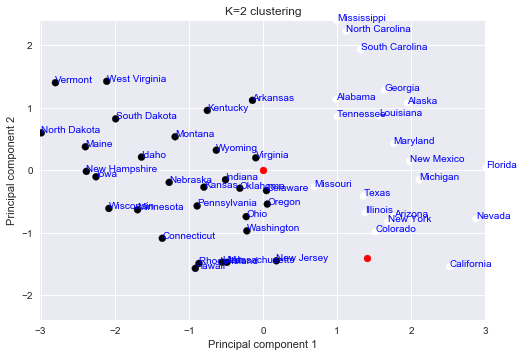

In [20]:
# Plot the centers
plt.scatter(centers[0], centers[1], color = 'red')

# Plot each state observation
plt.scatter(fits_df.PC1, fits_df.PC2, c = k2.labels_)
for i in fits_df.index:
    plt.annotate(i, (fits_df.PC1[i], fits_df.PC2[i]), color = 'blue')

plt.ylim(-ybound, ybound)
plt.xlim(-xbound, xbound)
plt.title('K=2 clustering')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.xticks()
plt.style.use('seaborn')

As shown in the plot above, the k-means clustering has partitioned our data points into two groups. While the groups have similar ranges with respect to the second principal component, the white colored group of states is associated with more negative values of PC2 while the black colored states reflect positive values of PC2. There's something wrong with my centers but I am unable to figure out the issue.

#### (3) Perform K-means clustering with K=4. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

In [21]:
k4 = KMeans(n_clusters = 4, n_init=30).fit(df_crime)

centers4 = pca_crime.fit_transform(k4.cluster_centers_)
centers4

array([[ -1.03311327e+00,   1.26936782e+00,   1.29755558e-01,
          1.24382616e-16],
       [ -1.71029416e+00,  -7.29088021e-01,  -2.23544401e-01,
          1.24382616e-16],
       [  2.08030193e+00,   2.98270765e-01,  -2.19070826e-01,
          1.24382616e-16],
       [  6.63105502e-01,  -8.38550566e-01,   3.12859669e-01,
          1.24382616e-16]])

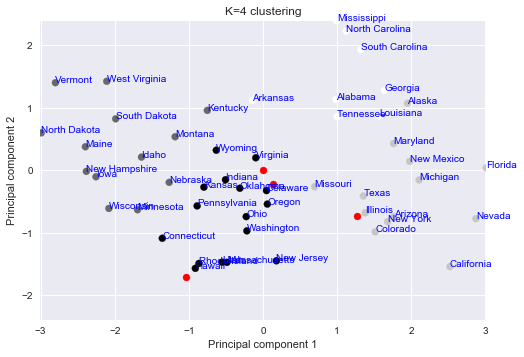

In [22]:
# Plot the centers
plt.scatter(centers4[0], centers4[1], color = 'red')

# Plot each state observation
plt.scatter(fits_df.PC1, fits_df.PC2, c = k4.labels_)
for i in fits_df.index:
    plt.annotate(i, (fits_df.PC1[i], fits_df.PC2[i]), color = 'blue')

plt.ylim(-ybound, ybound)
plt.xlim(-xbound, xbound)
plt.title('K=4 clustering')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.xticks()
plt.style.use('seaborn')

As shown in the plot above, now that there are 4 groups each one of our initial 2 groups appears to have been split roughly in half. The group associated with high PC1 values now has subgroups roughly reflecting high and low PC2 values. Similarly the group associated with negative PC1 values has also been split into two groups.

#### (4) Perform K-means clustering with K=3. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

In [23]:
k3 = KMeans(n_clusters = 3, n_init=30).fit(df_crime)

centers3 = pca_crime.fit_transform(k3.cluster_centers_)
centers3

array([[ -2.58789030e-01,   7.54848551e-01,   8.50053183e-17],
       [  1.87878698e+00,  -2.93675262e-01,   8.50053183e-17],
       [ -1.61999795e+00,  -4.61173289e-01,   8.50053183e-17]])

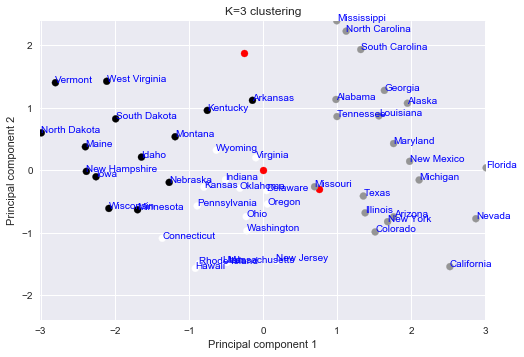

In [24]:
# Plot the centers
plt.scatter(centers3[0], centers3[1], color = 'red')

# Plot each state observation
plt.scatter(fits_df.PC1, fits_df.PC2, c = k3.labels_)
for i in fits_df.index:
    plt.annotate(i, (fits_df.PC1[i], fits_df.PC2[i]), color = 'blue')

plt.ylim(-ybound, ybound)
plt.xlim(-xbound, xbound)
plt.title('K=3 clustering')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.xticks()
plt.style.use('seaborn')

Similarly, we now have 3 groups in our data. It is most interesting to note that when we had 4 groups our two main groups were simply partitioned once more. Now that we have 3 groups, only one of the original groups can be partitioned and it is the group associated with the negative PC1 values. We do see some geographic clustering in our distribution of states. For example, southern states like Mississippi, NC, SC, Alabama, Georgia, Louisiana, and Tennesee are all in a similar region. The Dakotas are grouped along with Montana, Iowa, and Wisconsin.

#### (5) Perform K-means clustering with K=3 on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with K=3 based on the raw data.

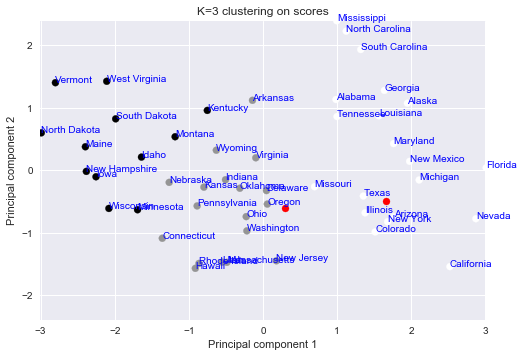

In [25]:
k3_alt = KMeans(n_clusters=3, n_init=30).fit(fits_df[['PC1', 'PC2']])

# Plot the centers
plt.scatter(k3_alt.cluster_centers_[0], k3_alt.cluster_centers_[1], color = 'red')

# Plot each state observation
plt.scatter(fits_df.PC1, fits_df.PC2, c = k3_alt.labels_)
for i in fits_df.index:
    plt.annotate(i, (fits_df.PC1[i], fits_df.PC2[i]), color = 'blue')

plt.ylim(-ybound, ybound)
plt.xlim(-xbound, xbound)
plt.title('K=3 clustering on scores')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.xticks()
plt.style.use('seaborn')

By performing K-means grouping on the PCA scores rather than the higher dimensional raw data we are testing the extent to which the information loss changes the grouping. The above chart shows that the centers do appear to change although the 3 groups appear to change less

#### (6) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states

Text(0.5,1,'Hierarchical clustering with complete linkage and Euclidean distance')

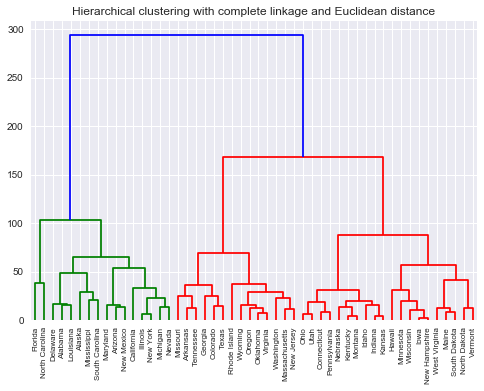

In [26]:
# I have been using properly scaled data but for this question I will revert to the unscaled raw data
df_crime_nonscaled = pd.read_csv(path_data+"/USArrests.csv", index_col="State")

hc = hierarchy.complete(df_crime_nonscaled)
hierarchy.dendrogram(hc, labels = df_crime_nonscaled.index)
plt.title("Hierarchical clustering with complete linkage and Euclidean distance")


#### (7) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

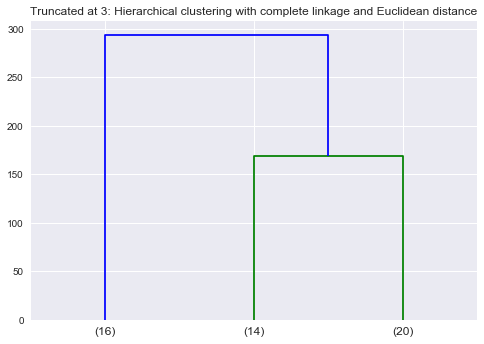

In [27]:
hierarchy.dendrogram(hc, labels = df_crime_nonscaled.index, truncate_mode='lastp', p=3)
plt.title("Truncated at 3: Hierarchical clustering with complete linkage and Euclidean distance")
plt.show()

In [28]:
# Create table of truncated dendrogram groups

trun_3 = hierarchy.cut_tree(hc, 3)
df_trunc_3 = pd.DataFrame(trun_3+1, index=df_crime_nonscaled.index, columns=['HC Group (1-3)'])
df_trunc_3.sort_values('HC Group (1-3)')

,HC Group (1-3)
State,
Alabama,1
Michigan,1
Maryland,1
New Mexico,1
Louisiana,1
New York,1
North Carolina,1
Illinois,1
Nevada,1


See table above for HC grouping

#### (8) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation 1. What effect does scaling the variables have on the hierarchical clustering obtained?

Text(0.5,1,'HC - Not Scaled')

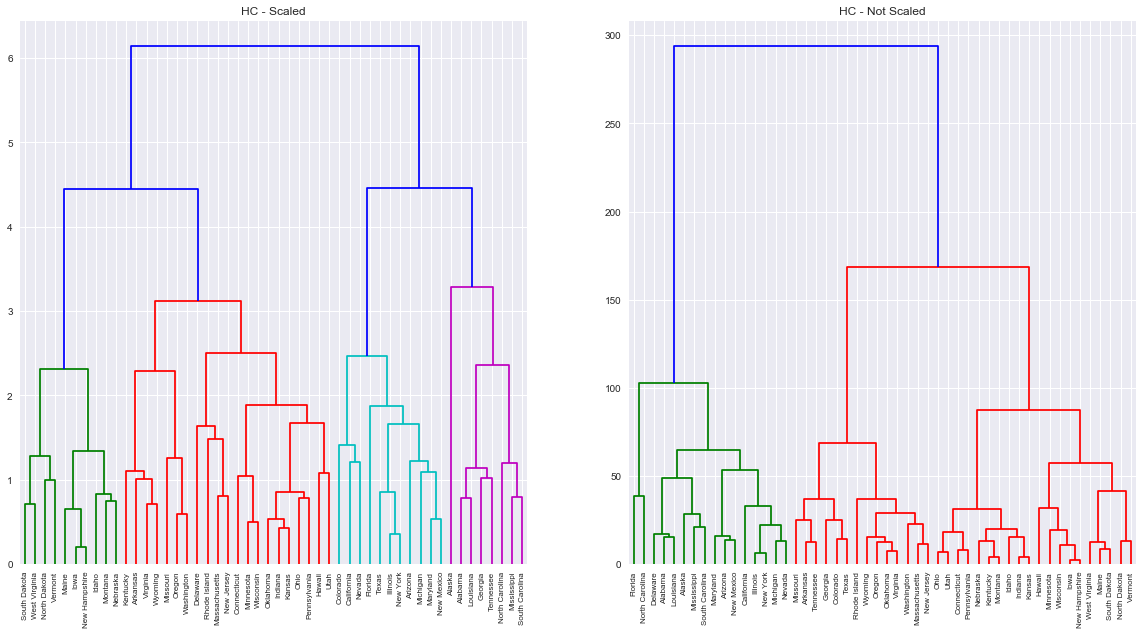

In [29]:
plt.figure(figsize=(20,10))

hc_scaled = hierarchy.complete(df_crime)

plt.subplot(1, 2, 1)
hierarchy.dendrogram(hc_scaled, labels = df_crime.index)
plt.title("HC - Scaled")

plt.subplot(1, 2, 2)
hierarchy.dendrogram(hc, labels = df_crime.index)
plt.title("HC - Not Scaled")

The most obvious difference between the scaled and the non-scaled dendogram is that the non scaled version is more consolidated at a lower point in the graph. Ignoring the obvious difference in y-axis scale due to the standardizing/not-standardizing, if we simply cut each graph at the same physical distance from the x-axis the non-scaled graph will have consolidated into fewer groups. Perhaps there are a few large magnitude variables that dominate the variation across states. Once we standardize the variables there is greater heterogeneity which takes longer to consolidate.